<a href="https://colab.research.google.com/github/bsmoores/AI-portfolio/blob/main/Hahn_Math_24_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Random Number Generator

In [32]:
#CDF PDF

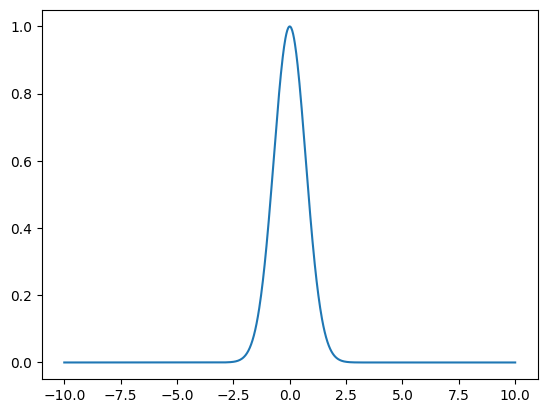

In [33]:
x = np.linspace(-10,10,1000)
y = 2.71**(-x**2)
plt.plot(x,y)

$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [34]:
def normal_pdf(x,mu,sigma):

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))        #To change the curve.

In [35]:
x = np.linspace(-6,6,1000)

In [36]:
mu = 0

In [37]:
sigma = 1

In [38]:
pdf = normal_pdf(x,mu,sigma)

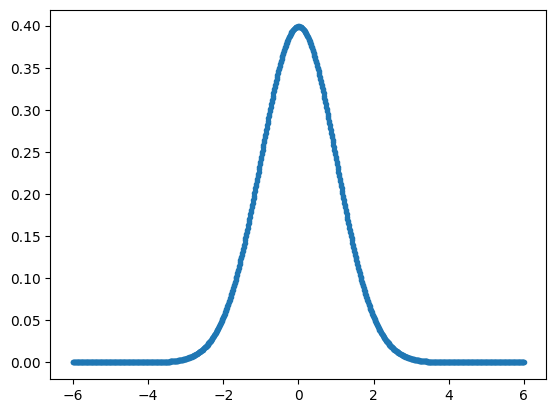

In [39]:
plt.plot(x,pdf,'.')
# plt.plot(x,y,'g.')

In [40]:
n=5                               #calculates the sum of these sliced elements using NumPy.
x[0:n]
np.sum(x[0:n])

-29.879879879879876

In [41]:
def cumulative_sum(x):   #calculates the cumulative sum of its elements, normalizes the cumulative sum array, and returns the result.

  y = np.zeros(x.shape)

  for n in range(x.shape[0]):

    y[n] = np.sum(x[0:n])

  y = y / np.max(y)

  return y

In [42]:
z=np.array([1,2,3,4,5])


In [43]:
z

array([1, 2, 3, 4, 5])

In [44]:
cdf = cumulative_sum(pdf)   #The CDF gives the cumulative probability of a random variable being less than or equal to a certain value.

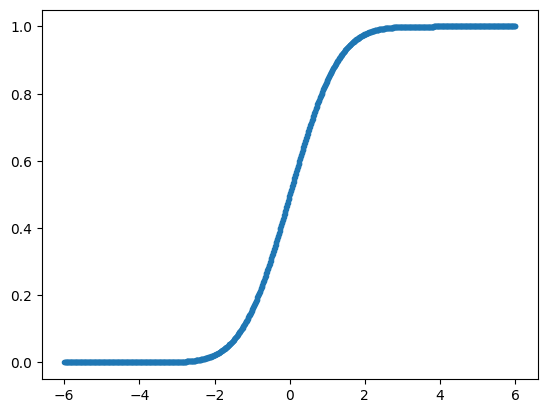

In [45]:
plt.plot(x,cdf,'.');

In [46]:
# d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
# plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

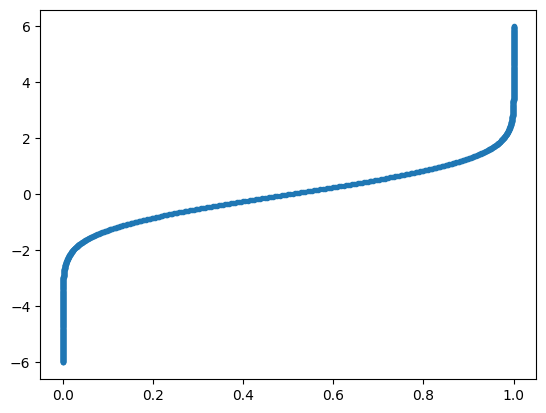

In [47]:
plt.plot(cdf,x,'.');

In [48]:
def find_nearest(array, target_value):
    array = np.asarray(array)
    idx = np.abs(array - target_value).argmin()
    nearest_value = array[idx]
    return nearest_value


In [49]:
find_nearest(cdf, 0.1)

0.09934495474887459

In [50]:
x[393]

-1.2792792792792795

In [51]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value))

  return idx

In [52]:
z = np.array([11.2,32,63,4.3,5.67])

In [53]:
find_nearest(z,22.1)

1

In [54]:
z[1]

32.0

In [55]:
r=np.random.random()

In [56]:
r

0.36731260946946087

In [57]:
x[find_nearest(cdf,r)]

-0.3303303303303302

In [59]:
xr = np.array([1.5, 2.8, 4.2])
cdf = np.array([0.1, 0.4, 0.7, 0.9])

# Initialize w array
w = np.zeros(xr.shape[0])

# Loop to find nearest values in cdf for each value in xr
for i in range(xr.shape[0]):
    w[i] = find_nearest(cdf, xr[i])

In [63]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]):

  w[i] = x[find_nearest(cdf, xr[i])]

In [64]:
w.shape

(3,)

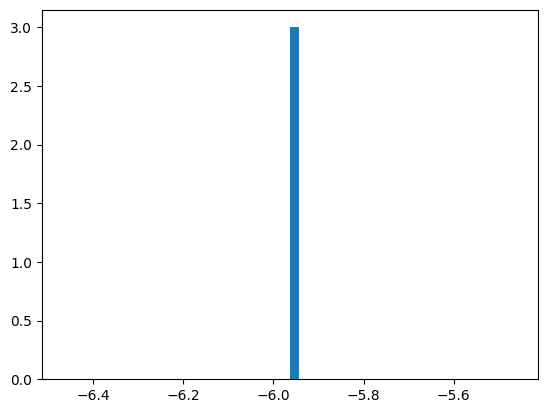

In [65]:
plt.hist(w,50);

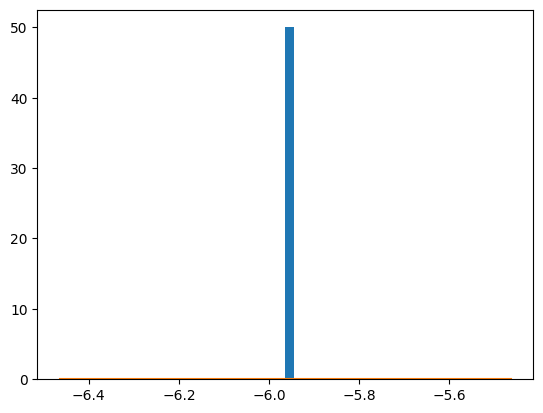

In [66]:
num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

# Homework

# Birthday Paradox

In [93]:
import random
  #imulates the birthday paradox, a phenomenon where the probability of two or more people sharing the same birthday becomes surprisingly high even in relatively small groups.
def simulate_birthday_paradox(people, simulations):
    matches = 1

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations
    return probability

# Number of people in the room
people = 20

# Number of simulations
simulations = 10000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability


0.4147

# Monty Hall

In [76]:
def simulate_monty_hall_final(simulations):
    wins_switching = 0
    wins_staying = 0
                                             #simulates the Monty Hall problem, a probability puzzle based on a game show scenario.
    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching


(0.3344, 0.6656)

# Simple Craps

In [85]:
def simulate_dice_game(simulations):       #simulates a simple dice game based on the rules of a simplified version of Craps.
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 30000

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning


0.4935

# Collector's Card Paradox


In [86]:
def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0
                                          #This simulation provides an estimate of the expected number of card packs a collector needs to purchase to complete their collection of n different characters.
    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 10

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs


29.442966666666667

In [87]:
import random                         # provides an estimate of the expected number of draws needed to find a matching pair of socks in a drawer with a given number of pairs.

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 10

# Number of simulations
simulations = 10000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws


4.6313